# **무료 ChatGPT**
도표 6-7. ChatGPT에 주차별 과다출하, 출하차질, RTF 불일치율의 집계 요청(p116)

주차별 RTF 차질 분석을 위한 테이블 B를 만든다.
테이블 A: 주차별 모델별 과다출하, 출하차질, RTF 불일치율
테이블 B: 주차별 과다출하, 출하차질, RTF 불일치율
파이썬 코드의 필드와 테이블 A, B의 필드는 영문명을 사용한다.
한글명과 영문명은 매핑은 아래와같다.
주차 Week, 모델 MODEL, 과다출하 P, 출하차질 M, RTF 불일치율 R
주차별 모델별 과다출하(P), 출하차질(M), RTF 불일치율을 먼저 계산하고(테이블 A), 이후에
주차별 평균값인 주차별 과다출하, 출하차질, RTF 불일치율을 계산한다(테이블 B).
아래 [RTF _DATA.xlsx의 예시]를 참조하여 RTF _DATA.xlsx를 읽는다.
RTF _DATA.xlsx에 주차별(Week) 모델별(MODEL) RTF(RTF)와 실적(ACTUAL)이 있다.
주차별 모델별 과다출하는 MAX(실적-RTF, 0) 이다.
주차별 모델별 출하차질은 MAX(RTF - 실적, 0) 이다.
주차별 모델별 RTF 불일치율은 (1 - 실적/RTF)의 절대값이다(단위는 %가 아니고 비율이다).
주차(Week)는 02, 03, 04…와 같이 문자형으로 저장하다.
data = pd.read_excel(file_path)를 사용한다.
데이터를 읽을 때, 한글명을 영문명으로 변경한다.
한글로 작성한다.
[RTF _DATA.xlsx의 예시]
주차	MODEL	RTF	실적
02	모델03	8626	8626
02	모델04	23587	26956
03	모델K9	195786	150841
03	모델K10	424819	402039

필요시 결과파일 저장 경로 수정 필요

In [1]:
import pandas as pd
import numpy as np

# 파일 경로 설정
file_path = "RTF_DATA.xlsx"

# 데이터 읽기 및 한글 컬럼명을 영문으로 변경
data = pd.read_excel('/content/sample_data/RTF_DATA.xlsx')
data.rename(columns={"주차": "Week", "MODEL": "MODEL", "RTF": "RTF", "실적": "ACTUAL"}, inplace=True)

# 주차별 모델별 과다출하(P), 출하차질(M), RTF 불일치율(R) 계산 (테이블 A 생성)
data["P"] = np.maximum(data["ACTUAL"] - data["RTF"], 0)  # 과다출하
data["M"] = np.maximum(data["RTF"] - data["ACTUAL"], 0)  # 출하차질
data["R"] = np.abs(1 - data["ACTUAL"] / data["RTF"])  # RTF 불일치율

# 테이블 A 출력
print("테이블 A (주차별 모델별 과다출하, 출하차질, RTF 불일치율):")
print(data[["Week", "MODEL", "P", "M", "R"]])

# 테이블 B 생성: 주차별 평균값 계산
table_b = data.groupby("Week")[["P", "M", "R"]].mean().reset_index()

# 테이블 B 출력
print("\n테이블 B (주차별 평균 과다출하, 출하차질, RTF 불일치율):")
print(table_b)

# 결과를 엑셀 파일로 저장 (선택 사항)
data.to_excel("Table_A.xlsx", index=False)  # 테이블 A 저장
table_b.to_excel("Table_B.xlsx", index=False)  # 테이블 B 저장


테이블 A (주차별 모델별 과다출하, 출하차질, RTF 불일치율):
      Week MODEL      P       M         R
0        2  모델03      0       0  0.000000
1        2  모델04   3369       0  0.142833
2        2  모델07      0       0  0.000000
3        2  모델08      0    9850  1.000000
4        2  모델09      0       0  0.000000
...    ...   ...    ...     ...       ...
1932    35  모델88  80574       0  0.054148
1933    35  모델90      0  767258  0.857143
1934    35  모델B2      0   23132  1.000000
1935    35  모델B4      0   23132  1.000000
1936    35  모델B6      0    3122  1.000000

[1937 rows x 5 columns]

테이블 B (주차별 평균 과다출하, 출하차질, RTF 불일치율):
    Week             P              M         R
0      2  13027.105263   34540.596491  0.408870
1      3  21024.909091   41872.054545  0.281535
2      4  16071.631579   48657.859649  0.376064
3      5  30753.134615   43136.673077  0.495096
4      6   7567.678571   35892.946429  0.257563
5      7   6382.696429   38713.875000  0.266979
6      8  15281.388889   48296.259259  0.245090
7      9   

In [2]:
# 한글 폰트 설치, ! 명령어는 코랩에서 시스템 명령어를 실행하게 해준다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

폰트 설정 완료: NanumBarunGothic


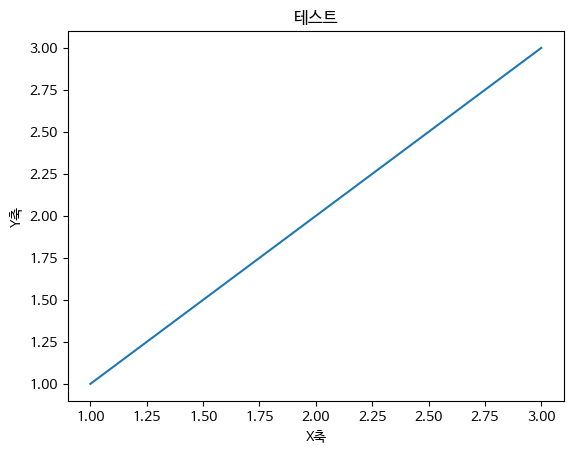

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로를 지정한다.
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 예시 경로

# 폰트 경로 유효성 검사 및 폰트 설정
if os.path.exists(font_path):
    font_name = fm.FontProperties(fname=font_path, size=10).get_name()  # 폰트 이름 가져오기
    plt.rcParams['font.family'] = font_name  # Matplotlib에 폰트 지정
    print(f"폰트 설정 완료: {font_name}")
else:
    print("지정한 폰트 경로를 찾을 수 없습니다. 기본 폰트를 사용합니다.")

# 테스트용 그래프를 그린다.
plt.figure()
plt.plot([1, 2, 3], [1, 2, 3])

# 한글 텍스트를 추가
plt.title('테스트')  # 그래프 제목
plt.xlabel('X축')   # X축 레이블
plt.ylabel('Y축')   # Y축 레이블

# 그래프 표시
plt.show()


주차별 과다출하, 출하차질, RTF 불일치율에 대한 혼합형 차트를 만든다.
X축은 주차이고 Y축의 왼쪽은 과다출하의 단위이고 오른쪽은 RTF 불일치율의 단위이다.
Y축은 천 단위마다 콤마를 표시하고, Y축 오른쪽은 0부터 0.6까지 표시한다.
Y축 설명은 생략한다.
RTF 불일치율(R)은 표시이 있는 파란색 꺾은 선형이다.
과다출하(P)는 짙은 분홍색이 있는 노란색이고 출하차질(R)은 짙은 초록색이며, 윤곽선은 검은색인
누적 세로 막대형이다.
제목은 "RTF 차질 분석" 이다.

# **단, 데이터 읽어보는 부분 수정 필요**

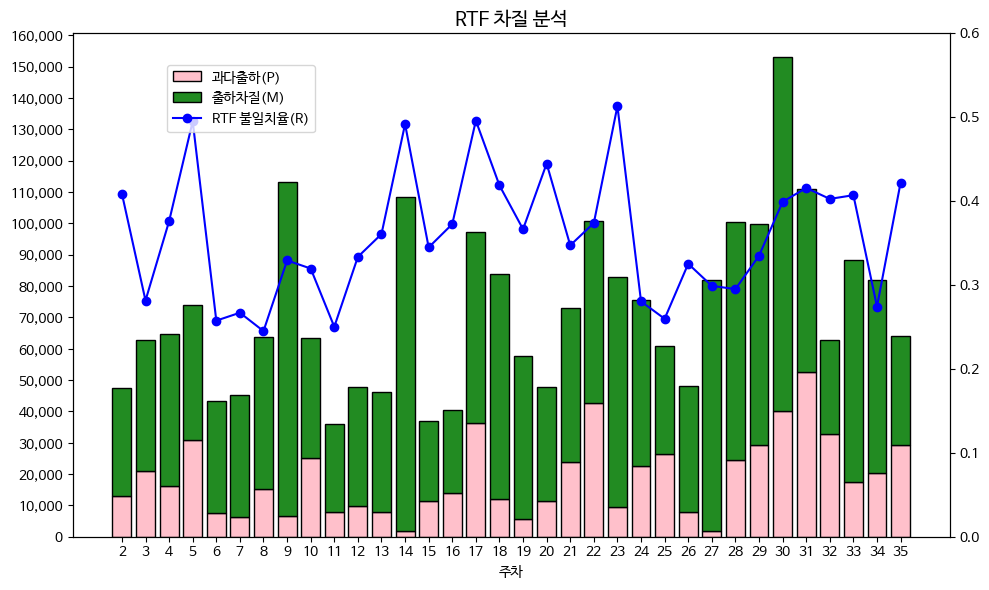

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data to emulate "Table_B"

# Initialize figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for 과다출하(P) and 출하차질(M) (stacked)
bar_width = 0.6
x = np.arange(len(table_b["Week"]))

# 과다출하 (P)
bars_p = ax1.bar(
    x,
    table_b["P"],
    color="#FFC0CB",  # Pink fill
    edgecolor="black",  # Black outline
    label="과다출하(P)"
)

# 출하차질 (M) on top of 과다출하
bars_m = ax1.bar(
    x,
    table_b["M"],
    bottom=table_b["P"],  # Stacked on P
    color="#228B22",  # Green fill
    edgecolor="black",  # Black outline
    label="출하차질(M)"
)

# Left Y-axis settings (for 과다출하, 출하차질)
ax1.set_ylabel("")
ax1.set_yticks(np.arange(0, max(table_b["P"] + table_b["M"]) + 10000, 10000))
ax1.tick_params(axis='y', labelcolor="black")
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Right Y-axis for RTF 불일치율 (R)
ax2 = ax1.twinx()
ax2.plot(
    x,
    table_b["R"],
    color="blue",
    marker="o",
    label="RTF 불일치율(R)"
)
ax2.set_ylim(0, 0.6)
ax2.set_yticks(np.arange(0, 0.7, 0.1))
ax2.tick_params(axis='y', labelcolor="black")

# X-axis settings
ax1.set_xticks(x)
ax1.set_xticklabels(table_b["Week"], fontsize=10)
ax1.set_xlabel("주차")

# Chart Title
plt.title("RTF 차질 분석", fontsize=14)

# Legend
fig.legend(
    loc="upper left",
    bbox_to_anchor=(0.1, 0.95),
    bbox_transform=ax1.transAxes
)

# Layout adjustment and display
plt.tight_layout()
plt.show()

